논문 "Going Deeper with Convolutions"을 요약하면 다음과 같습니다:

1. 서론: 이미지 인식과 객체 검출 분야에서 깊은 학습이 주는 진전을 논의하고, 네트워크 구조의 심화가 필요하다는 점을 강조합니다. 특히, 더 효율적인 계산 자원 활용을 위한 새로운 아키텍처의 필요성을 언급합니다.

2. 관련 연구: 기존의 컨볼루션 신경망 구조와 최신 연구 성과를 검토하며, 기존 모델들의 한계와 비교하여 인셉션 모델의 도입 배경을 설명합니다.

3. 동기 및 고려 사항: 네트워크의 크기를 증가시키는 것이 성능 향상의 기본적 방법이지만, 이에 따른 오버피팅 위험과 계산 자원의 비효율적 사용 문제를 해결하고자 합니다. 인셉션 아키텍처가 이러한 문제들을 어떻게 해결할 수 있는지를 설명합니다.

4. 아키텍처 세부 사항: 인셉션 모듈의 구조적 세부사항과 이를 통해 얻을 수 있는 이점들을 자세히 설명합니다. 다양한 크기의 필터와 풀링 경로를 조합하여 더 나은 정보 처리를 목표로 합니다.

5. GoogLeNet: 인셉션 아키텍처를 활용한 GoogLeNet의 구조와 ILSVRC 2014에서의 성능을 설명합니다. 이 모델은 매개변수의 수를 줄이면서도 정확도를 높이는 데 성공했습니다.

6. 훈련 방법론: GoogLeNet의 훈련 과정과 사용된 기술들, 그리고 이러한 방법들이 어떻게 최종 모델의 성능을 향상시켰는지에 대해 설명합니다.

7. ILSVRC 2014 분류 도전 설정 및 결과: GoogLeNet이 어떻게 다양한 크롭과 모델을 앙상블하여 최고의 분류 성능을 달성했는지에 대한 기술적 세부사항을 제공합니다.

8. ILSVRC 2014 탐지 도전 설정 및 결과: GoogLeNet을 사용한 객체 탐지 접근 방식과 이를 통해 얻은 결과를 논의합니다. R-CNN과 비교하여 GoogLeNet의 강점을 강조합니다.

9. 결론: GoogLeNet과 인셉션 아키텍처가 컴퓨터 비전 분야에서 기대하는 최적의 희소 구조를 얼마나 잘 근사화하고 향상시켰는지를 요약하며, 향후 연구 방향을 제시합니다.


## 논문 리뷰(블로그)

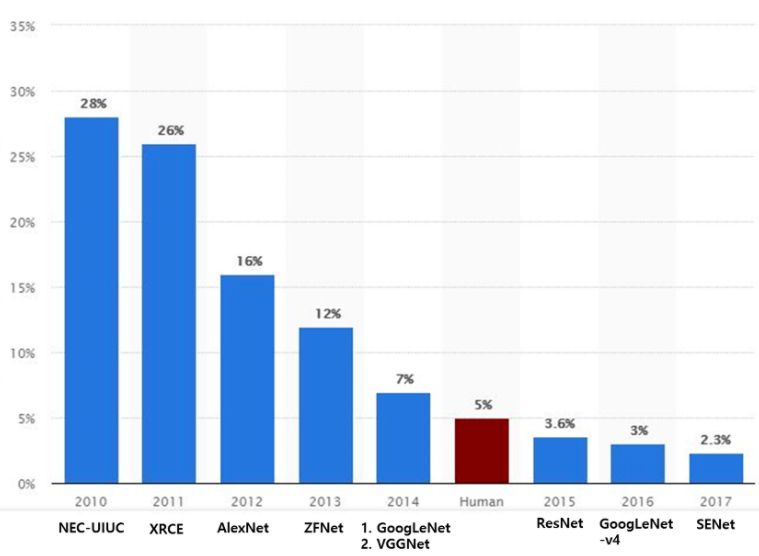

AlexNet 대비 16%오차율에서 7%오차율로 더 좋은 성능을 발휘

특징 : GoogLeNet은 22층을 가진 deep neural network
층이 깊어지면 문제점 : 파라미터 증가 -> network Overfitting이 쉬워지고 bottleneck가 발생됨, 메모리 사용량 증가
-> 이를 해결하기 위해 효율성이 높은 neural network를 만들어 냈으며 이것이 GoogLeNet
AlexNet대비 파라미터 수가 12배 적음


파라미터가 그리고 메모리 사용량이 늘어나는 것을 방지하기 위한 
GooLeNet의 접근 방향
-> NIN(Network in Network)접근 방식을 차용
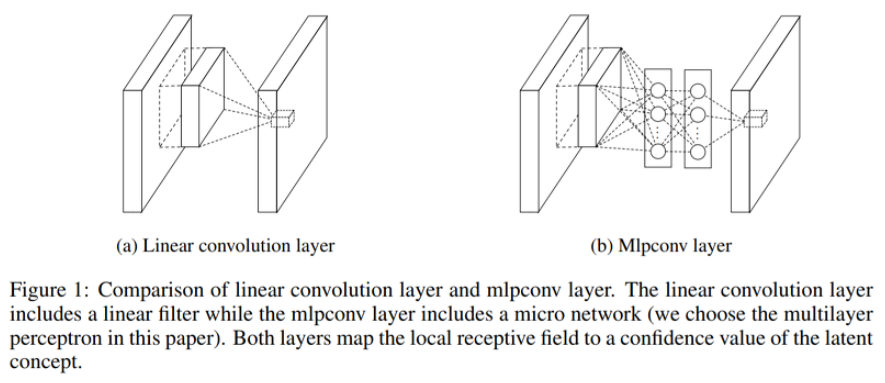

이 접근방식을 통해 FCN과 CNN이 갖는 dense 구조가 갖는 문제를 Sparse구조로 바꿔 냈음

### 토막상식 : Sparse data(희소 데이터), dense data(밀집 데이터)
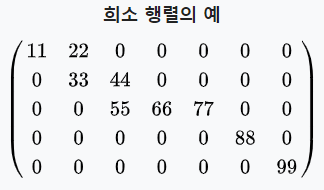
데이터가 빡빡하게 차있으면 dense data
간단하게.. dense한 방법론으로 딥러닝을 다루면 정확도와 성능향상이 같이 이뤄지나, 무거워진다
반대로 sparse한 방법론은 빠르고, 가벼워진다.


## GooLeNet의 inception Module

dense한 요소들을 Inception module 적용을 통해 Spase구조로 근사화 함

방법 :  Inception module에서 feature map을 효과적으로 추출하기 위해 1x1, 3x3, 5x5의 convolution 연산을 각각 수행하며, 각각 Matrix의 height, width가 같아야 하므로 pooling 연산에서 padding을 추가

여기서 핵심 :  Inception module을 보면 1x1 convolution이 보이는데, 이것이 inception module의 핵심입니다. 1x1 convolution의 목적은 dimmension reduction을 적용하여 필요한 연산량을 감소

효과 : 다양한 크기의 filter(1x1, 3x3, 5x5)를 적용하여 여러 특징을 추출하지만 연산량을 낮춤

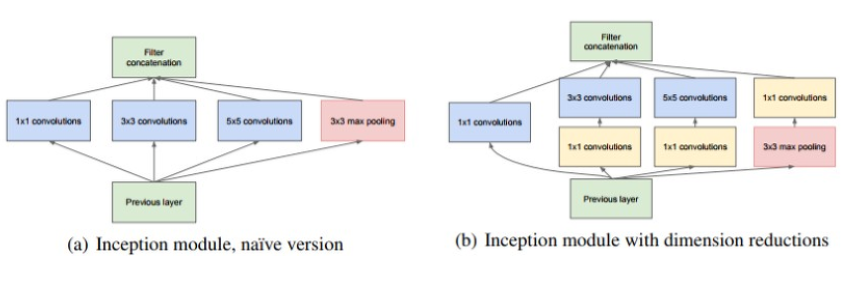
GooLeNet의 구조 : 위 두가지 형태의 Inception module을 네트워크 레이어로 쌓아가면서 모델을 구성(모든 레이어가 위 모듈을 쓴건 아닌ㅁ)

## GooLeNet의 구조

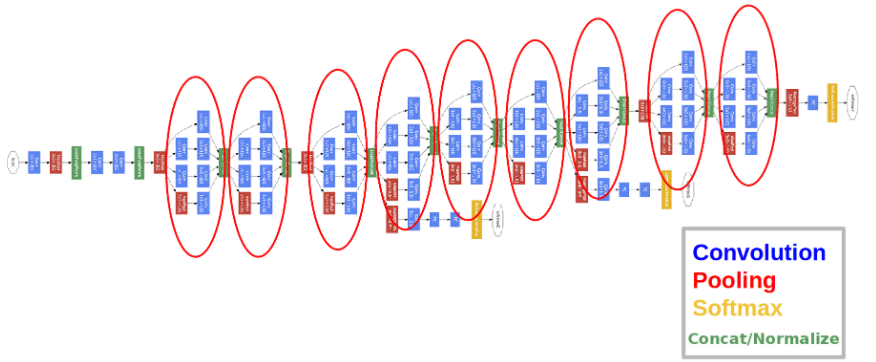
붉은색 원이 GooLeNet가 제안한 inception module이다.
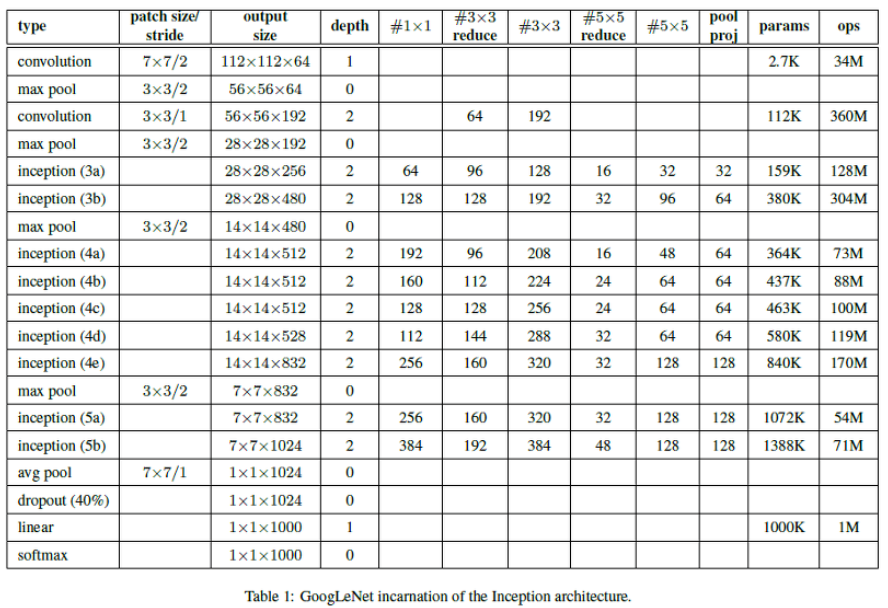


# GooLeNet 파이토치로 구현하기

In [27]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F #이거는 활성화 함수 모듈
import torch.optim as optim

import torchvision #예제 이미지 데이터셋이 모여있는 모듈
from torchvision import datasets, transforms

from tqdm import tqdm #훈련 진행상황 체크

## 1. 데이터셋 받아오기

논문 구현에 참조한 블로그 : https://deep-learning-study.tistory.com/523

이미지 데이터셋 설명 블로그 : https://developer-together.tistory.com/49

논문 구현에는 STL10 dataset을 사용했으나, CIFAR-100을 사용하기로 함

In [28]:
#Raw 데이터셋 받아오기


train_raw_data = datasets.CIFAR100("data", 
                                   train=True, 
                                   download=True, 
                                   transform=transforms.ToTensor())
test_raw_data = datasets.CIFAR100("data", 
                                   train=False, 
                                   download=True, 
                                   transform=transforms.ToTensor())


Files already downloaded and verified
Files already downloaded and verified


In [29]:
#이미지 전처리11 : RGB채널별 평균/표준편차 계산 함수 설계
def normal_parm_func(input_data):

    meanRGB = [np.mean(x.numpy(), axis=(1,2)) for x, _ in input_data]
    stdRGB = [np.std(x.numpy(), axis=(1,2)) for x, _ in input_data]

    RGB_mean_list, RGB_std_list = [], []

    for i in range(3):
        RGB_mean_list.append(
            np.mean([m[i] for m in meanRGB])
        )
        RGB_std_list.append(
            np.mean([s[i] for s in stdRGB])
        )

    return RGB_mean_list, RGB_std_list


proc_train_data = normal_parm_func(train_raw_data)
proc_test_data = normal_parm_func(test_raw_data)

print(f"Train Mean: {[format(m, '.3f') for m in proc_train_data[0]]}, Train Std: {[format(s, '.3f') for s in proc_train_data[1]]}")
print(f"Test Mean: {[format(m, '.3f') for m in proc_test_data[0]]}, Test Std: {[format(s, '.3f') for s in proc_test_data[1]]}")

Train Mean: ['0.507', '0.487', '0.441'], Train Std: ['0.201', '0.198', '0.202']
Test Mean: ['0.509', '0.487', '0.442'], Test Std: ['0.202', '0.200', '0.204']


In [30]:
#이미지 전처리 2

#이미지 변환방식이 저장된 객체 생성
train_transformation = transforms.Compose([
    transforms.ToTensor(), 
    #입력하려는 train_raw데이터가 텐서 자료형이지만
    #이걸 안써주면 PIL자료형이 되버림...
    transforms.Resize((224, 224)), #GooGleNet 입력 이미지는 224 224 3임
    transforms.RandomHorizontalFlip(),
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])
test_transformation = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((224, 224)), #GooGleNet 입력 이미지는 224 224 3임
    transforms.Normalize(mean=proc_train_data[0], std=proc_train_data[1])
    #훈련데이터의 평균, 표준편차 입력
])

#이미지에 위 변환방식을 적용
train_raw_data.transform = train_transformation
test_raw_data.transform = test_transformation

#데이터 로더 생성
train_loader = torch.utils.data.DataLoader(train_raw_data, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_raw_data, batch_size=64, shuffle=False)



#데이터로더 속성정보 출력 함수
#위 설정한 변수의 속성정보 출력하기
def count_images_and_labels(loader):
    num_images = 0
    label_set = set()
    for data, labels in loader:
        num_images += data.size(0)
        label_set.update(labels.tolist())
    
    return num_images, len(label_set)


train_images, train_label_count = count_images_and_labels(train_loader)
test_images, test_label_count = count_images_and_labels(test_loader)

print(f"Training Images: {train_images}, Unique Labels: {train_label_count}")
print(f"Testing Images: {test_images}, Unique Labels: {test_label_count}")


Training Images: 50000, Unique Labels: 100
Testing Images: 10000, Unique Labels: 100


In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# CUDA가 사용 가능한 경우, 추가 정보 출력
if device.type == 'cuda':
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Capability: {torch.cuda.get_device_capability(0)}")
    print(f"Total Memory: {torch.cuda.get_device_properties(0).total_memory / (1024 ** 3):.2f} GB")  # GB 단위로 변환
    print(f"Number of GPUs: {torch.cuda.device_count()}")

cuda
GPU Name: NVIDIA GeForce RTX 4090 Laptop GPU
GPU Capability: (8, 9)
Total Memory: 15.99 GB
Number of GPUs: 1


## 모델 설계하기

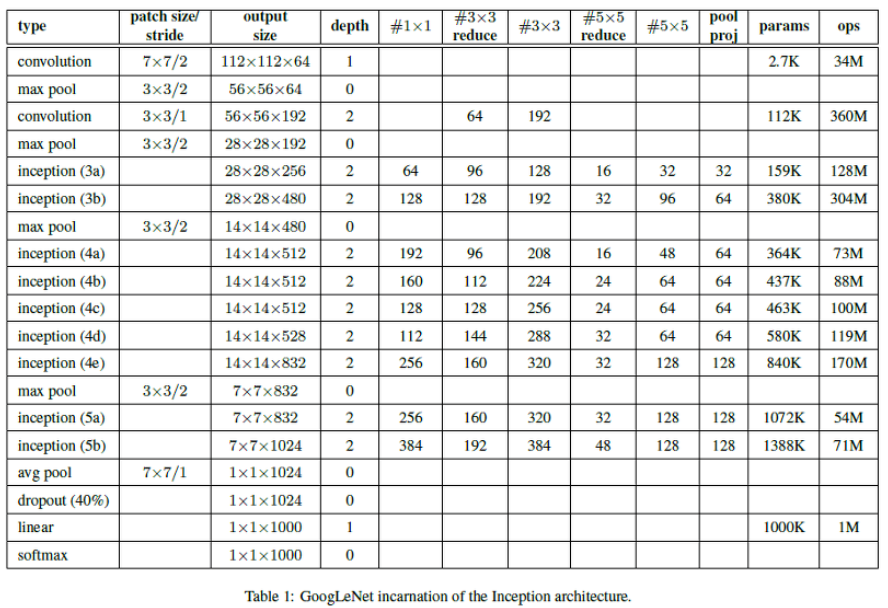

이거만 봐서는 네트워크가 어떤 구조인지 좀 알기가 어려운데;;;

### GoogLeNet 구조의 핵심 요소

**1. Inception 모듈**: 
- 이 모듈은 여러 크기의 컨볼루션 연산과 풀링(pooling) 연산을 동시에 수행합니다. 특히, 1x1, 3x3, 그리고 5x5 크기의 컨볼루션 필터를 사용하여 다양한 크기의 특징을 추출할 수 있습니다. 이렇게 함으로써, 네트워크가 다양한 스케일에서 특징을 효과적으로 학습할 수 있게 됩니다.
- 각 컨볼루션 연산 전에 1x1 컨볼루션을 사용하는 것이 일반적입니다. 이는 차원 축소의 역할을 하며, 파라미터의 수와 연산량을 감소시키는데 도움을 줍니다.

**2. 깊이와 폭의 효율적 확장**:
- GoogLeNet은 총 22층의 깊이를 가지며 (과거 모델들에 비해 매우 깊음), 이를 통해 더 복잡한 특징들을 학습할 수 있습니다. 
- 네트워크의 폭은 Inception 모듈을 통해 조절됩니다. 각 Inception 모듈 내에서 병렬로 처리되는 다양한 컨볼루션과 풀링 연산들은 네트워크가 필요로 하는 계산 리소스를 크게 증가시키지 않으면서도 네트워크의 폭을 넓힐 수 있게 해줍니다.

**3. 보조 분류기 (Auxiliary Classifiers)**:
- 네트워크의 중간 부분에 위치한 보조 분류기는 네트워크의 학습을 돕고, 그라디언트 소실 문제를 줄이는 데 도움을 줍니다. 이 분류기들은 학습 중에만 사용되며, 최종 예측에서는 사용되지 않습니다.

**4. 평균 풀링 (Average Pooling)**:
-  GoogLeNet의 마지막 부분에서는 전통적인 완전 연결 층(fully connected layers) 대신 평균 풀링 층을 사용합니다. 이는 파라미터의 수를 줄이고, 과적합의 위험을 감소시킵니다.

GoogLeNet은 이러한 구조적 혁신을 통해 이미지 인식과 분류에서 우수한 성능을 보여줬으며, 이후의 많은 연구와 네트워크 설계에 영향을 미쳤습니다. 이 네트워크는 깊이, 복잡도, 그리고 효율성 사이의 균형을 잘 보여주는 예입니다.
이 마크다운 코드를 복사하여 마크다운을 지원하는 어떤 플랫폼에서도 사용하실 수 있습니다.

GooLeNet는 잘 보면 어려워 보이지만 inception Module을 9번 반복 사용한 것이다.
그럼 이것에 대한 클래스를 먼저 만들고 시작하면 된다.
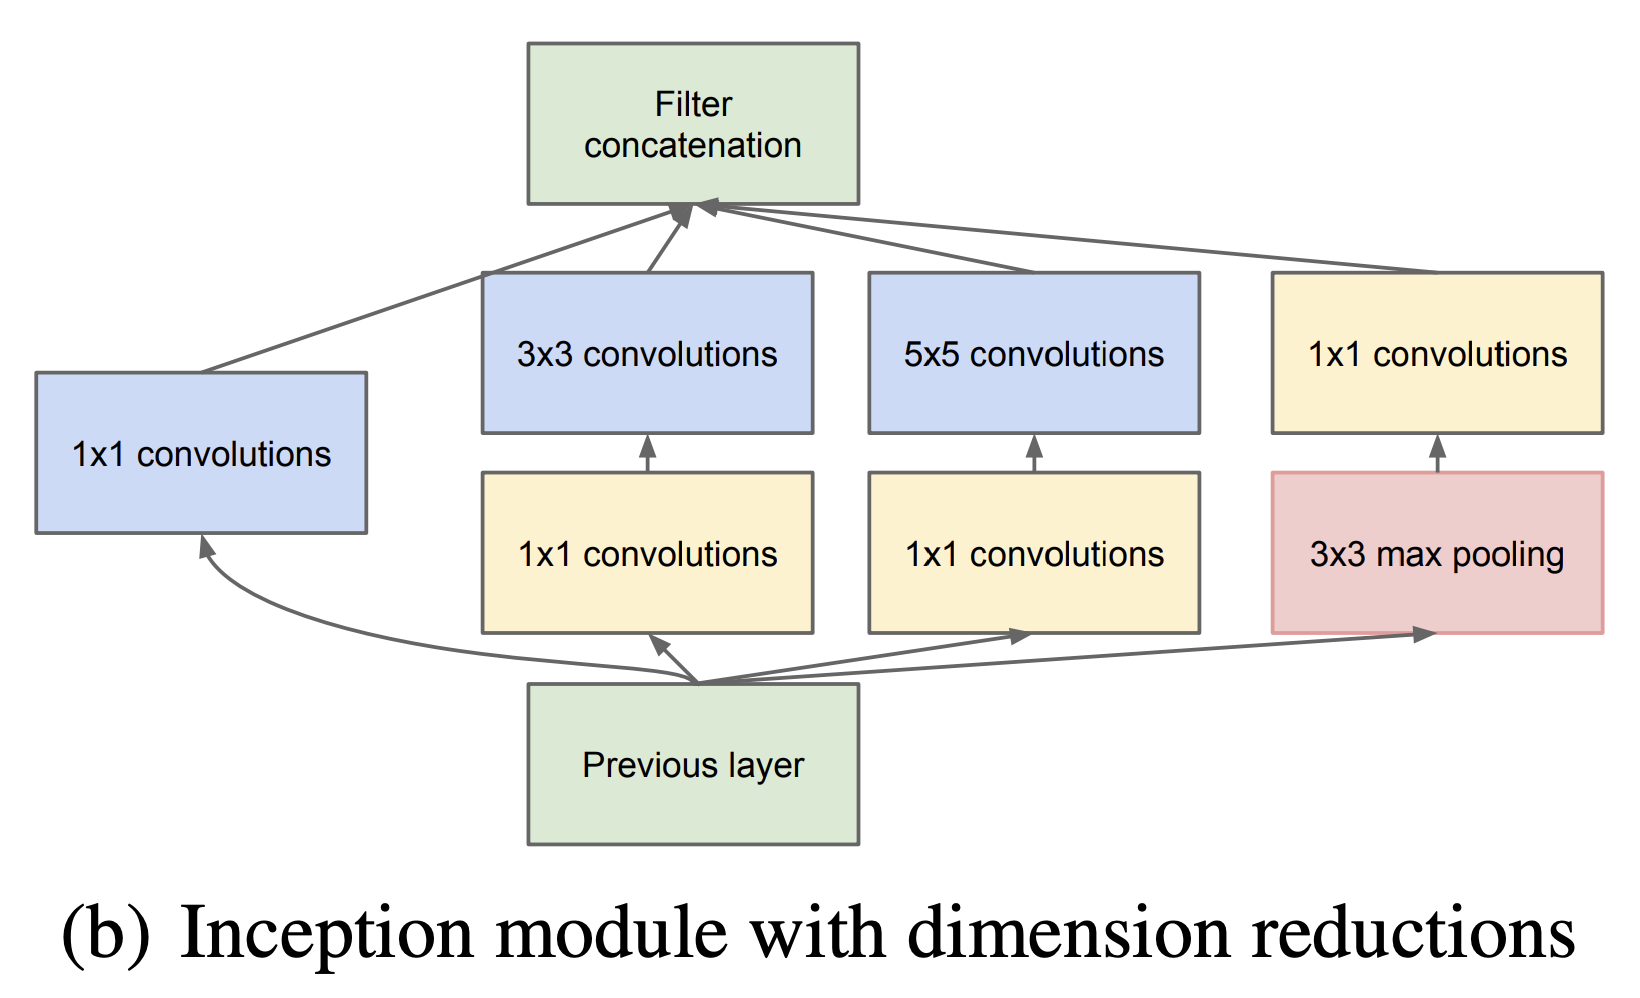

In [32]:
#gooLeNet의 inception모듈 만들기

class Inception_module(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3_red, ch3x3, ch5x5_red, ch5x5, pool):
        super(Inception_module, self).__init__()

        #1번째 네트워크
        self.conv1x1 = nn.Conv2d(in_channels, ch1x1, kernel_size=1)

        #2번째 네트워크
        self.conv3x3 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3_red, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch3x3_red, ch3x3, kernel_size=3, padding=1),
            nn.ReLU(inplace=True)
        )

        #3번째 네트워크
        self.conv5x5 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5_red, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(ch5x5_red, ch5x5, kernel_size=5, padding=2),
            nn.ReLU(inplace=True)
        )

        #4번째 네트워크
        self.pool_net = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool, kernel_size=1),
            nn.ReLU(inplace=True)
        )

    def forward(self, x):
        x1 = self.conv1x1(x)
        x2 = self.conv3x3(x)
        x3 = self.conv5x5(x)
        x4 = self.pool_net(x)

        return torch.cat([x1, x2, x3, x4], 1)


In [33]:
#이거는 GoogLeNet설계하면서 필요한 네트워크 블록임.. 이거는 뭔지 잘 모르겟음..
#보조분류기 라는 거 같은데 모르겟음?

class AuxModule(nn.Module):
    def __init__(self, in_channels, num_classes):
        super(AuxModule, self).__init__()

        self.avgpool = nn.AdaptiveAvgPool2d((4,4))

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 128, kernel_size=1),
            nn.ReLU(inplace=True)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(4*4*128, 1024),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.7),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        x = self.avgpool(x)
        x = self.conv1(x)
        x = torch.flatten(x, 1)
        return self.fc(x)

In [34]:
#위 설계한 inception모듈을 받아서 전체 GoogLeNet설계하기


class GoogLeNet(torch.nn.Module):
    def __init__(self, in_channels, num_classes):
        super(GoogLeNet, self).__init__()

        self.training = True
        
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.LocalResponseNorm(2)
        )

        self.conv2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.LocalResponseNorm(2),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.inception_3a = Inception_module(192, 64, 96, 128, 16, 32, 32)
        self.inception_3b = Inception_module(256, 128, 128, 192, 32, 96, 64)
        self.maxpool_3 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.inception_4a = Inception_module(480, 192, 96, 208, 16, 48, 64)
        self.aux1 = AuxModule(512, num_classes)

        self.inception_4b = Inception_module(512, 160, 112, 224, 24, 64, 64)
        self.inception_4c = Inception_module(512, 128, 128, 256, 24, 64, 64)
        self.inception_4d = Inception_module(512, 112, 144, 288, 32, 64, 64)
        self.aux2 = AuxModule(528, num_classes)

        self.inception_4e = Inception_module(528, 256, 160, 320, 32, 128, 128)
        self.maxpool_4 = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.inception_5a = Inception_module(832, 256, 160, 320, 32, 128, 128)
        self.inception_5b = Inception_module(832, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.dropout = nn.Dropout2d(p=0.4)
        self.fc = nn.Linear(1024, num_classes)
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        
        x = self.inception_3a(x)
        x = self.inception_3b(x)
        x = self.maxpool_3(x)

        x = self.inception_4a(x)
        if self.training:
            out1 = self.aux1(x)

        x = self.inception_4b(x)
        x = self.inception_4c(x)
        x = self.inception_4d(x)
        if self.training:
            out2 = self.aux2(x)

        x = self.inception_4e(x)
        x = self.maxpool_4(x)

        x = self.inception_5a(x)
        x = self.inception_5b(x)

        x = self.avgpool(x)

        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)                
        if self.training:
            return [x, out1, out2]
        else:
            return x
    
    # 훈련 모드 설정
    def set_train(self):
        self.train()  # 내장 train 메서드를 호출

    # 평가 모드 설정
    def set_eval(self):
        self.eval()  # 내장 eval 메서드를 호출

In [35]:
#설계한 모델이 잘 되었느지 확인해보자..
import torchsummary

ex_model = GoogLeNet(in_channels = 3, num_classes=100)
ex_model.to(device)


#설계한 모델이 정상동작하는지 확인하는 코드
try:
    torchsummary.summary(ex_model, input_size=(3, 224, 224), device='cuda')
except Exception as e:
    print(f"Error occurred during torchsummary execution: {e}")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,472
              ReLU-2         [-1, 64, 112, 112]               0
         MaxPool2d-3           [-1, 64, 56, 56]               0
 LocalResponseNorm-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,160
              ReLU-6           [-1, 64, 56, 56]               0
            Conv2d-7          [-1, 192, 56, 56]         110,784
              ReLU-8          [-1, 192, 56, 56]               0
 LocalResponseNorm-9          [-1, 192, 56, 56]               0
        MaxPool2d-10          [-1, 192, 28, 28]               0
           Conv2d-11           [-1, 64, 28, 28]          12,352
           Conv2d-12           [-1, 96, 28, 28]          18,528
             ReLU-13           [-1, 96, 28, 28]               0
           Conv2d-14          [-1, 128,

In [36]:
#옵티마이저 및 로스 암수 정의하기
lr = 1e-5 #블로그에서는 좀 더 작은 값으로 움직이게 함
criterion = nn.CrossEntropyLoss(reduction='sum') #로스함수는 CEL 사용

optimizer = optim.Adam(ex_model.parameters(), lr=lr)
#LR값은 0.001로 좀 더 큰 스텝으로 움직이게 한다

In [37]:
#훈련을 위한 함수 정의

def model_train(model, data_loader, loss_fn, optimizer_fn, processing_device):

    model.train() #모델을 훈련 모드로 설정

    #loss와 accuracy를 계산하기 위한 임시 변수를 생성
    run_size, run_loss, corr = 0, 0, 0

    progress_bar = tqdm(data_loader) #이때 사용되는 데이터는 훈련용 데이터


    for batch_idx, (image, label) in enumerate(progress_bar, start=1):
        #입력된 데이터를 먼저 GPU로 이전하기
        image = image.to(processing_device)
        label = label.to(processing_device)

        #전사과정 수행
        pred0, pred1, pred2 = model(image) #출력이 3개 나온다.

        loss_0 = criterion(pred0, label)
        loss_1 = criterion(pred1, label)
        loss_2 = criterion(pred2, label) #출력별 loos중간결과값을 계산함
        
        loss = loss_0 + 0.3*(loss_1 + loss_2)

        #옵티마이저의 Gradient 초기화
        optimizer_fn.zero_grad()

        #backward 과정 수행
        loss.backward() #Backprogration을 진행하여 Gradient계산
        optimizer_fn.step() #계산된 gradient(모델 파라미터)를 업데이트


        #여기부터는 학습이 잘 되고 있는지 확인하는 부분
        _, pred = pred0.max(dim=1)
        corr += pred.eq(label).sum().item()
        
        run_loss += loss.item() * image.size(0)
        run_size += image.size(0)
        progress_bar.set_description('[Training] loss: ' + \
                            f'{run_loss / run_size:.4f}, accuracy: ' + \
                            f'{corr / run_size:.4f}')
        
    acc = corr / len(data_loader.dataset)

    return run_loss / len(data_loader.dataset), acc

 ### 토막상식
 ```pred0, pred1, pred2 = model(image) #출력이 3개 나온다.```

 여기서 pred0이 모델의 주 출력이고 나머지 pred1, pred2는 학습 과정에서 모델의 일반화 능력을 향상시키기 위한 보조출력이라 한다.

 따라서 정확도 계산에서는 ```_, pred = pred0.max(dim=1)``` 이렇게 쓴다..

In [40]:
#평가를 위한 구문 작성
def model_evaluate(model, data_loader, loss_fn, processing_device):
    model.eval() #모델을 평가 모드로 전환

    #gradient업데이틀를 방지해주자
    with torch.no_grad():

        #여기서도 loss, accuracy 계산을 위한 임시 변수 선언
        run_loss, corr = 0, 0


        for image, label in data_loader: #이때 사용되는 데이터는 평가용 데이터
            #입력된 데이터를 먼저 GPU로 이전하기
            image = image.to(processing_device)
            label = label.to(processing_device)


            #평가 결과를 도출하자
            outputs = model(image) #평가모드는 1개만 출력이 나오나보네...

            _, pred = outputs.max(dim=1)

            
            #모델의 평가 결과 도출 부분
            # 배치의 실제 크기에 맞추어 정확도와 손실을 계산
            corr += torch.sum(pred.eq(label)).item()
            run_loss += loss_fn(outputs, label).item() * image.size(0)

        # 전체 데이터셋에 대한 평균 손실과 정확도 계산
        acc = corr / len(data_loader.dataset)

        return run_loss / len(data_loader.dataset), acc


In [41]:
#훈련과 검증 실행


min_loss = np.inf
MODEL_NAME = 'GoogLeNet'


for epoch in range(100):
    # Model Training
    # 훈련 손실과 정확도를 반환 받습니다.
    train_loss, train_acc = model_train(ex_model, train_loader, criterion, optimizer, device)

    # 검증 손실과 검증 정확도를 반환 받습니다.
    val_loss, val_acc = model_evaluate(ex_model, test_loader, criterion, device)   
    
    # val_loss 가 개선되었다면 min_loss를 갱신하고 model의 가중치(weights)를 저장합니다.
    if val_loss < min_loss:
        print(f'[INFO] val_loss has been improved from {min_loss:.5f} to {val_loss:.5f}. Saving Model!')
        min_loss = val_loss
        torch.save(ex_model.state_dict(), f'{MODEL_NAME}.pth')
    
    # Epoch 별 결과를 출력합니다.
    print(f'epoch {epoch+1:02d}, loss: {train_loss:.5f}, acc: {train_acc:.5f}, val_loss: {val_loss:.5f}, val_accuracy: {val_acc:.5f}')

  0%|          | 0/782 [00:00<?, ?it/s]c:\Users\Z13_ASH\AppData\Local\Programs\Python\Python38\lib\site-packages\torch\nn\functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)
[Training] loss: 455.5407, accuracy: 0.0249: 100%|██████████| 782/782 [02:07<00:00,  6.12it/s]


[INFO] val_loss has been improved from inf to 280.13689. Saving Model!
epoch 01, loss: 455.54075, acc: 0.02494, val_loss: 280.13689, val_accuracy: 0.03560


[Training] loss: 439.4645, accuracy: 0.0407: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 280.13689 to 267.03845. Saving Model!
epoch 02, loss: 439.46453, acc: 0.04070, val_loss: 267.03845, val_accuracy: 0.06590


[Training] loss: 425.8484, accuracy: 0.0591: 100%|██████████| 782/782 [01:45<00:00,  7.42it/s]


[INFO] val_loss has been improved from 267.03845 to 258.81058. Saving Model!
epoch 03, loss: 425.84835, acc: 0.05910, val_loss: 258.81058, val_accuracy: 0.07920


[Training] loss: 416.7185, accuracy: 0.0767: 100%|██████████| 782/782 [01:46<00:00,  7.33it/s]


[INFO] val_loss has been improved from 258.81058 to 254.15485. Saving Model!
epoch 04, loss: 416.71845, acc: 0.07666, val_loss: 254.15485, val_accuracy: 0.09280


[Training] loss: 409.7447, accuracy: 0.0897: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


[INFO] val_loss has been improved from 254.15485 to 248.68121. Saving Model!
epoch 05, loss: 409.74470, acc: 0.08966, val_loss: 248.68121, val_accuracy: 0.11150


[Training] loss: 404.0925, accuracy: 0.0994: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


[INFO] val_loss has been improved from 248.68121 to 245.57037. Saving Model!
epoch 06, loss: 404.09252, acc: 0.09940, val_loss: 245.57037, val_accuracy: 0.11200


[Training] loss: 399.3458, accuracy: 0.1058: 100%|██████████| 782/782 [01:47<00:00,  7.30it/s]


[INFO] val_loss has been improved from 245.57037 to 242.41909. Saving Model!
epoch 07, loss: 399.34575, acc: 0.10584, val_loss: 242.41909, val_accuracy: 0.11970


[Training] loss: 395.1312, accuracy: 0.1147: 100%|██████████| 782/782 [01:46<00:00,  7.31it/s]


[INFO] val_loss has been improved from 242.41909 to 240.00227. Saving Model!
epoch 08, loss: 395.13121, acc: 0.11468, val_loss: 240.00227, val_accuracy: 0.12770


[Training] loss: 391.0207, accuracy: 0.1190: 100%|██████████| 782/782 [01:50<00:00,  7.08it/s]


[INFO] val_loss has been improved from 240.00227 to 237.65306. Saving Model!
epoch 09, loss: 391.02067, acc: 0.11902, val_loss: 237.65306, val_accuracy: 0.13290


[Training] loss: 387.1749, accuracy: 0.1271: 100%|██████████| 782/782 [01:50<00:00,  7.10it/s]


[INFO] val_loss has been improved from 237.65306 to 235.05430. Saving Model!
epoch 10, loss: 387.17490, acc: 0.12708, val_loss: 235.05430, val_accuracy: 0.14210


[Training] loss: 383.4767, accuracy: 0.1330: 100%|██████████| 782/782 [01:50<00:00,  7.07it/s]


[INFO] val_loss has been improved from 235.05430 to 232.67084. Saving Model!
epoch 11, loss: 383.47672, acc: 0.13296, val_loss: 232.67084, val_accuracy: 0.14880


[Training] loss: 379.4654, accuracy: 0.1415: 100%|██████████| 782/782 [01:49<00:00,  7.16it/s]


[INFO] val_loss has been improved from 232.67084 to 231.23209. Saving Model!
epoch 12, loss: 379.46545, acc: 0.14152, val_loss: 231.23209, val_accuracy: 0.15140


[Training] loss: 376.0109, accuracy: 0.1463: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]


[INFO] val_loss has been improved from 231.23209 to 226.88308. Saving Model!
epoch 13, loss: 376.01093, acc: 0.14632, val_loss: 226.88308, val_accuracy: 0.16690


[Training] loss: 371.8962, accuracy: 0.1537: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]


[INFO] val_loss has been improved from 226.88308 to 225.78422. Saving Model!
epoch 14, loss: 371.89621, acc: 0.15366, val_loss: 225.78422, val_accuracy: 0.16700


[Training] loss: 368.5526, accuracy: 0.1600: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


[INFO] val_loss has been improved from 225.78422 to 222.22983. Saving Model!
epoch 15, loss: 368.55265, acc: 0.16000, val_loss: 222.22983, val_accuracy: 0.18060


[Training] loss: 364.6361, accuracy: 0.1659: 100%|██████████| 782/782 [01:48<00:00,  7.24it/s]


[INFO] val_loss has been improved from 222.22983 to 219.89903. Saving Model!
epoch 16, loss: 364.63615, acc: 0.16586, val_loss: 219.89903, val_accuracy: 0.18560


[Training] loss: 361.0677, accuracy: 0.1733: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]


[INFO] val_loss has been improved from 219.89903 to 217.97060. Saving Model!
epoch 17, loss: 361.06767, acc: 0.17332, val_loss: 217.97060, val_accuracy: 0.19370


[Training] loss: 357.6918, accuracy: 0.1824: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 217.97060 to 214.64474. Saving Model!
epoch 18, loss: 357.69179, acc: 0.18238, val_loss: 214.64474, val_accuracy: 0.20260


[Training] loss: 354.5084, accuracy: 0.1870: 100%|██████████| 782/782 [01:50<00:00,  7.08it/s]


[INFO] val_loss has been improved from 214.64474 to 213.05412. Saving Model!
epoch 19, loss: 354.50837, acc: 0.18700, val_loss: 213.05412, val_accuracy: 0.20640


[Training] loss: 351.0188, accuracy: 0.1938: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]


[INFO] val_loss has been improved from 213.05412 to 210.20534. Saving Model!
epoch 20, loss: 351.01879, acc: 0.19380, val_loss: 210.20534, val_accuracy: 0.21040


[Training] loss: 348.2224, accuracy: 0.1984: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]


[INFO] val_loss has been improved from 210.20534 to 209.94810. Saving Model!
epoch 21, loss: 348.22236, acc: 0.19844, val_loss: 209.94810, val_accuracy: 0.21370


[Training] loss: 344.9909, accuracy: 0.2056: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s]


[INFO] val_loss has been improved from 209.94810 to 205.60226. Saving Model!
epoch 22, loss: 344.99090, acc: 0.20560, val_loss: 205.60226, val_accuracy: 0.23120


[Training] loss: 341.8568, accuracy: 0.2143: 100%|██████████| 782/782 [01:48<00:00,  7.19it/s]


[INFO] val_loss has been improved from 205.60226 to 203.70871. Saving Model!
epoch 23, loss: 341.85676, acc: 0.21426, val_loss: 203.70871, val_accuracy: 0.23400


[Training] loss: 338.9887, accuracy: 0.2179: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


epoch 24, loss: 338.98870, acc: 0.21792, val_loss: 204.08442, val_accuracy: 0.23370


[Training] loss: 336.2668, accuracy: 0.2242: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 203.70871 to 200.30953. Saving Model!
epoch 25, loss: 336.26685, acc: 0.22420, val_loss: 200.30953, val_accuracy: 0.24510


[Training] loss: 333.2535, accuracy: 0.2306: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


[INFO] val_loss has been improved from 200.30953 to 198.79695. Saving Model!
epoch 26, loss: 333.25352, acc: 0.23058, val_loss: 198.79695, val_accuracy: 0.24920


[Training] loss: 330.9368, accuracy: 0.2340: 100%|██████████| 782/782 [01:48<00:00,  7.24it/s]


[INFO] val_loss has been improved from 198.79695 to 196.65507. Saving Model!
epoch 27, loss: 330.93685, acc: 0.23402, val_loss: 196.65507, val_accuracy: 0.25330


[Training] loss: 328.3019, accuracy: 0.2392: 100%|██████████| 782/782 [01:48<00:00,  7.23it/s]


[INFO] val_loss has been improved from 196.65507 to 194.49105. Saving Model!
epoch 28, loss: 328.30194, acc: 0.23924, val_loss: 194.49105, val_accuracy: 0.26020


[Training] loss: 325.5963, accuracy: 0.2465: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]


[INFO] val_loss has been improved from 194.49105 to 193.98093. Saving Model!
epoch 29, loss: 325.59631, acc: 0.24648, val_loss: 193.98093, val_accuracy: 0.25790


[Training] loss: 322.6860, accuracy: 0.2519: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s]


[INFO] val_loss has been improved from 193.98093 to 192.56891. Saving Model!
epoch 30, loss: 322.68599, acc: 0.25188, val_loss: 192.56891, val_accuracy: 0.26680


[Training] loss: 320.2162, accuracy: 0.2587: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 192.56891 to 189.58270. Saving Model!
epoch 31, loss: 320.21624, acc: 0.25866, val_loss: 189.58270, val_accuracy: 0.27590


[Training] loss: 318.1994, accuracy: 0.2612: 100%|██████████| 782/782 [01:54<00:00,  6.83it/s]


[INFO] val_loss has been improved from 189.58270 to 188.78502. Saving Model!
epoch 32, loss: 318.19936, acc: 0.26124, val_loss: 188.78502, val_accuracy: 0.28070


[Training] loss: 315.9718, accuracy: 0.2665: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 188.78502 to 186.30413. Saving Model!
epoch 33, loss: 315.97176, acc: 0.26654, val_loss: 186.30413, val_accuracy: 0.28690


[Training] loss: 313.8309, accuracy: 0.2727: 100%|██████████| 782/782 [01:50<00:00,  7.06it/s]


[INFO] val_loss has been improved from 186.30413 to 185.12927. Saving Model!
epoch 34, loss: 313.83086, acc: 0.27268, val_loss: 185.12927, val_accuracy: 0.29140


[Training] loss: 311.1553, accuracy: 0.2777: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 185.12927 to 184.17820. Saving Model!
epoch 35, loss: 311.15534, acc: 0.27774, val_loss: 184.17820, val_accuracy: 0.29680


[Training] loss: 308.9594, accuracy: 0.2823: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


epoch 36, loss: 308.95935, acc: 0.28228, val_loss: 185.40113, val_accuracy: 0.29040


[Training] loss: 307.3236, accuracy: 0.2842: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 184.17820 to 181.38826. Saving Model!
epoch 37, loss: 307.32364, acc: 0.28418, val_loss: 181.38826, val_accuracy: 0.30120


[Training] loss: 304.8990, accuracy: 0.2895: 100%|██████████| 782/782 [01:48<00:00,  7.24it/s]


[INFO] val_loss has been improved from 181.38826 to 179.53514. Saving Model!
epoch 38, loss: 304.89902, acc: 0.28952, val_loss: 179.53514, val_accuracy: 0.30700


[Training] loss: 303.1524, accuracy: 0.2965: 100%|██████████| 782/782 [01:47<00:00,  7.24it/s]


[INFO] val_loss has been improved from 179.53514 to 179.22588. Saving Model!
epoch 39, loss: 303.15235, acc: 0.29648, val_loss: 179.22588, val_accuracy: 0.31090


[Training] loss: 301.2181, accuracy: 0.2979: 100%|██████████| 782/782 [01:50<00:00,  7.10it/s]


[INFO] val_loss has been improved from 179.22588 to 178.66984. Saving Model!
epoch 40, loss: 301.21807, acc: 0.29794, val_loss: 178.66984, val_accuracy: 0.31000


[Training] loss: 299.5467, accuracy: 0.3020: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


[INFO] val_loss has been improved from 178.66984 to 176.87605. Saving Model!
epoch 41, loss: 299.54665, acc: 0.30196, val_loss: 176.87605, val_accuracy: 0.31150


[Training] loss: 297.0707, accuracy: 0.3094: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 176.87605 to 174.92966. Saving Model!
epoch 42, loss: 297.07070, acc: 0.30936, val_loss: 174.92966, val_accuracy: 0.32140


[Training] loss: 295.5475, accuracy: 0.3106: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 174.92966 to 174.07850. Saving Model!
epoch 43, loss: 295.54748, acc: 0.31058, val_loss: 174.07850, val_accuracy: 0.32180


[Training] loss: 293.9798, accuracy: 0.3106: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 174.07850 to 172.31099. Saving Model!
epoch 44, loss: 293.97977, acc: 0.31056, val_loss: 172.31099, val_accuracy: 0.32780


[Training] loss: 292.0370, accuracy: 0.3184: 100%|██████████| 782/782 [01:47<00:00,  7.25it/s]


[INFO] val_loss has been improved from 172.31099 to 171.57103. Saving Model!
epoch 45, loss: 292.03701, acc: 0.31840, val_loss: 171.57103, val_accuracy: 0.33110


[Training] loss: 289.9471, accuracy: 0.3229: 100%|██████████| 782/782 [01:47<00:00,  7.24it/s]


[INFO] val_loss has been improved from 171.57103 to 171.15958. Saving Model!
epoch 46, loss: 289.94713, acc: 0.32290, val_loss: 171.15958, val_accuracy: 0.33140


[Training] loss: 288.1429, accuracy: 0.3267: 100%|██████████| 782/782 [01:48<00:00,  7.21it/s]


[INFO] val_loss has been improved from 171.15958 to 169.82692. Saving Model!
epoch 47, loss: 288.14288, acc: 0.32670, val_loss: 169.82692, val_accuracy: 0.33680


[Training] loss: 286.6219, accuracy: 0.3301: 100%|██████████| 782/782 [01:49<00:00,  7.17it/s]


[INFO] val_loss has been improved from 169.82692 to 169.42649. Saving Model!
epoch 48, loss: 286.62195, acc: 0.33010, val_loss: 169.42649, val_accuracy: 0.34280


[Training] loss: 284.9834, accuracy: 0.3357: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 169.42649 to 168.57083. Saving Model!
epoch 49, loss: 284.98338, acc: 0.33570, val_loss: 168.57083, val_accuracy: 0.34110


[Training] loss: 283.6547, accuracy: 0.3364: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 168.57083 to 167.13571. Saving Model!
epoch 50, loss: 283.65466, acc: 0.33638, val_loss: 167.13571, val_accuracy: 0.34390


[Training] loss: 281.5252, accuracy: 0.3403: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 51, loss: 281.52525, acc: 0.34028, val_loss: 167.31213, val_accuracy: 0.34360


[Training] loss: 279.8181, accuracy: 0.3457: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


[INFO] val_loss has been improved from 167.13571 to 166.75233. Saving Model!
epoch 52, loss: 279.81813, acc: 0.34572, val_loss: 166.75233, val_accuracy: 0.34730


[Training] loss: 278.5124, accuracy: 0.3483: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 166.75233 to 165.40940. Saving Model!
epoch 53, loss: 278.51243, acc: 0.34828, val_loss: 165.40940, val_accuracy: 0.34920


[Training] loss: 276.8445, accuracy: 0.3524: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 165.40940 to 165.16673. Saving Model!
epoch 54, loss: 276.84446, acc: 0.35242, val_loss: 165.16673, val_accuracy: 0.35030


[Training] loss: 275.5284, accuracy: 0.3540: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 165.16673 to 162.64273. Saving Model!
epoch 55, loss: 275.52835, acc: 0.35398, val_loss: 162.64273, val_accuracy: 0.36300


[Training] loss: 274.2210, accuracy: 0.3578: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


epoch 56, loss: 274.22098, acc: 0.35784, val_loss: 163.10075, val_accuracy: 0.36350


[Training] loss: 272.5743, accuracy: 0.3615: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


[INFO] val_loss has been improved from 162.64273 to 160.55243. Saving Model!
epoch 57, loss: 272.57427, acc: 0.36154, val_loss: 160.55243, val_accuracy: 0.36750


[Training] loss: 270.9882, accuracy: 0.3652: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 58, loss: 270.98822, acc: 0.36518, val_loss: 160.70808, val_accuracy: 0.36600


[Training] loss: 269.3967, accuracy: 0.3694: 100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


[INFO] val_loss has been improved from 160.55243 to 160.37547. Saving Model!
epoch 59, loss: 269.39669, acc: 0.36944, val_loss: 160.37547, val_accuracy: 0.36510


[Training] loss: 267.8006, accuracy: 0.3740: 100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


[INFO] val_loss has been improved from 160.37547 to 158.92145. Saving Model!
epoch 60, loss: 267.80060, acc: 0.37402, val_loss: 158.92145, val_accuracy: 0.36930


[Training] loss: 266.6641, accuracy: 0.3759: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


[INFO] val_loss has been improved from 158.92145 to 158.69321. Saving Model!
epoch 61, loss: 266.66410, acc: 0.37590, val_loss: 158.69321, val_accuracy: 0.37140


[Training] loss: 265.1187, accuracy: 0.3768: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 158.69321 to 157.69581. Saving Model!
epoch 62, loss: 265.11867, acc: 0.37680, val_loss: 157.69581, val_accuracy: 0.37710


[Training] loss: 264.0176, accuracy: 0.3793: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


epoch 63, loss: 264.01761, acc: 0.37926, val_loss: 157.77660, val_accuracy: 0.37780


[Training] loss: 262.5858, accuracy: 0.3863: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]


[INFO] val_loss has been improved from 157.69581 to 156.86592. Saving Model!
epoch 64, loss: 262.58575, acc: 0.38634, val_loss: 156.86592, val_accuracy: 0.38140


[Training] loss: 260.8770, accuracy: 0.3872: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 156.86592 to 155.09608. Saving Model!
epoch 65, loss: 260.87697, acc: 0.38724, val_loss: 155.09608, val_accuracy: 0.38710


[Training] loss: 259.9487, accuracy: 0.3907: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


epoch 66, loss: 259.94872, acc: 0.39070, val_loss: 155.56122, val_accuracy: 0.38320


[Training] loss: 258.6957, accuracy: 0.3940: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 67, loss: 258.69573, acc: 0.39404, val_loss: 155.13486, val_accuracy: 0.38700


[Training] loss: 257.3090, accuracy: 0.3945: 100%|██████████| 782/782 [01:50<00:00,  7.05it/s]


[INFO] val_loss has been improved from 155.09608 to 154.00609. Saving Model!
epoch 68, loss: 257.30898, acc: 0.39446, val_loss: 154.00609, val_accuracy: 0.38670


[Training] loss: 256.4114, accuracy: 0.3989: 100%|██████████| 782/782 [01:48<00:00,  7.24it/s]


[INFO] val_loss has been improved from 154.00609 to 152.39307. Saving Model!
epoch 69, loss: 256.41142, acc: 0.39894, val_loss: 152.39307, val_accuracy: 0.39250


[Training] loss: 254.3642, accuracy: 0.4015: 100%|██████████| 782/782 [01:48<00:00,  7.19it/s]


epoch 70, loss: 254.36423, acc: 0.40154, val_loss: 152.77847, val_accuracy: 0.39310


[Training] loss: 253.2367, accuracy: 0.4071: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 71, loss: 253.23672, acc: 0.40714, val_loss: 153.03019, val_accuracy: 0.39390


[Training] loss: 252.0956, accuracy: 0.4110: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 152.39307 to 151.09424. Saving Model!
epoch 72, loss: 252.09558, acc: 0.41100, val_loss: 151.09424, val_accuracy: 0.40130


[Training] loss: 250.6943, accuracy: 0.4122: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 73, loss: 250.69435, acc: 0.41222, val_loss: 151.40080, val_accuracy: 0.39640


[Training] loss: 249.4508, accuracy: 0.4159: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 151.09424 to 150.58409. Saving Model!
epoch 74, loss: 249.45085, acc: 0.41588, val_loss: 150.58409, val_accuracy: 0.39920


[Training] loss: 248.5488, accuracy: 0.4181: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


[INFO] val_loss has been improved from 150.58409 to 149.21376. Saving Model!
epoch 75, loss: 248.54882, acc: 0.41810, val_loss: 149.21376, val_accuracy: 0.40470


[Training] loss: 247.0554, accuracy: 0.4231: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


epoch 76, loss: 247.05541, acc: 0.42306, val_loss: 149.83611, val_accuracy: 0.40660


[Training] loss: 245.8448, accuracy: 0.4232: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


epoch 77, loss: 245.84476, acc: 0.42320, val_loss: 149.47488, val_accuracy: 0.40870


[Training] loss: 244.4493, accuracy: 0.4265: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


[INFO] val_loss has been improved from 149.21376 to 147.63697. Saving Model!
epoch 78, loss: 244.44928, acc: 0.42650, val_loss: 147.63697, val_accuracy: 0.40870


[Training] loss: 243.7921, accuracy: 0.4271: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]


[INFO] val_loss has been improved from 147.63697 to 147.40797. Saving Model!
epoch 79, loss: 243.79210, acc: 0.42710, val_loss: 147.40797, val_accuracy: 0.41630


[Training] loss: 242.2091, accuracy: 0.4322: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


epoch 80, loss: 242.20914, acc: 0.43224, val_loss: 147.97760, val_accuracy: 0.41180


[Training] loss: 241.0633, accuracy: 0.4370: 100%|██████████| 782/782 [01:52<00:00,  6.98it/s]


[INFO] val_loss has been improved from 147.40797 to 146.71836. Saving Model!
epoch 81, loss: 241.06333, acc: 0.43698, val_loss: 146.71836, val_accuracy: 0.41340


[Training] loss: 240.3017, accuracy: 0.4383: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 146.71836 to 145.30315. Saving Model!
epoch 82, loss: 240.30167, acc: 0.43832, val_loss: 145.30315, val_accuracy: 0.42210


[Training] loss: 238.9592, accuracy: 0.4408: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 83, loss: 238.95920, acc: 0.44082, val_loss: 147.03285, val_accuracy: 0.41420


[Training] loss: 237.8167, accuracy: 0.4452: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 145.30315 to 144.88266. Saving Model!
epoch 84, loss: 237.81668, acc: 0.44522, val_loss: 144.88266, val_accuracy: 0.42260


[Training] loss: 237.0780, accuracy: 0.4470: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 85, loss: 237.07799, acc: 0.44702, val_loss: 145.53580, val_accuracy: 0.42060


[Training] loss: 235.7509, accuracy: 0.4459: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


[INFO] val_loss has been improved from 144.88266 to 144.59582. Saving Model!
epoch 86, loss: 235.75090, acc: 0.44588, val_loss: 144.59582, val_accuracy: 0.42530


[Training] loss: 234.6926, accuracy: 0.4520: 100%|██████████| 782/782 [01:51<00:00,  7.02it/s]


epoch 87, loss: 234.69264, acc: 0.45200, val_loss: 145.35277, val_accuracy: 0.42140


[Training] loss: 233.2700, accuracy: 0.4547: 100%|██████████| 782/782 [01:51<00:00,  7.00it/s]


[INFO] val_loss has been improved from 144.59582 to 142.82655. Saving Model!
epoch 88, loss: 233.27004, acc: 0.45472, val_loss: 142.82655, val_accuracy: 0.42990


[Training] loss: 232.5711, accuracy: 0.4549: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s]


epoch 89, loss: 232.57114, acc: 0.45494, val_loss: 143.83968, val_accuracy: 0.42440


[Training] loss: 231.4975, accuracy: 0.4603: 100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


epoch 90, loss: 231.49751, acc: 0.46032, val_loss: 142.89708, val_accuracy: 0.42640


[Training] loss: 230.4527, accuracy: 0.4611: 100%|██████████| 782/782 [01:52<00:00,  6.98it/s]


epoch 91, loss: 230.45268, acc: 0.46110, val_loss: 143.27906, val_accuracy: 0.43000


[Training] loss: 229.0461, accuracy: 0.4627: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


epoch 92, loss: 229.04612, acc: 0.46270, val_loss: 143.47858, val_accuracy: 0.42680


[Training] loss: 228.5995, accuracy: 0.4652: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 142.82655 to 142.15737. Saving Model!
epoch 93, loss: 228.59949, acc: 0.46520, val_loss: 142.15737, val_accuracy: 0.43170


[Training] loss: 227.1409, accuracy: 0.4697: 100%|██████████| 782/782 [01:50<00:00,  7.09it/s]


[INFO] val_loss has been improved from 142.15737 to 141.01333. Saving Model!
epoch 94, loss: 227.14091, acc: 0.46974, val_loss: 141.01333, val_accuracy: 0.43740


[Training] loss: 225.9798, accuracy: 0.4706: 100%|██████████| 782/782 [01:48<00:00,  7.19it/s]


epoch 95, loss: 225.97983, acc: 0.47060, val_loss: 142.46365, val_accuracy: 0.43120


[Training] loss: 225.2155, accuracy: 0.4749: 100%|██████████| 782/782 [01:52<00:00,  6.97it/s]


epoch 96, loss: 225.21546, acc: 0.47494, val_loss: 141.78066, val_accuracy: 0.43530


[Training] loss: 224.0646, accuracy: 0.4760: 100%|██████████| 782/782 [01:51<00:00,  7.01it/s]


[INFO] val_loss has been improved from 141.01333 to 139.35529. Saving Model!
epoch 97, loss: 224.06462, acc: 0.47604, val_loss: 139.35529, val_accuracy: 0.43930


[Training] loss: 222.9359, accuracy: 0.4790: 100%|██████████| 782/782 [01:51<00:00,  7.04it/s]


[INFO] val_loss has been improved from 139.35529 to 138.73839. Saving Model!
epoch 98, loss: 222.93593, acc: 0.47896, val_loss: 138.73839, val_accuracy: 0.44220


[Training] loss: 222.5296, accuracy: 0.4810: 100%|██████████| 782/782 [01:51<00:00,  6.99it/s]


epoch 99, loss: 222.52963, acc: 0.48098, val_loss: 139.56640, val_accuracy: 0.44260


[Training] loss: 221.3988, accuracy: 0.4810: 100%|██████████| 782/782 [01:51<00:00,  6.98it/s]


epoch 100, loss: 221.39877, acc: 0.48096, val_loss: 138.79958, val_accuracy: 0.44280


In [42]:
ex_model.load_state_dict(torch.load(f'{MODEL_NAME}.pth'))

final_loss, final_acc = model_evaluate(ex_model, test_loader, criterion, device)
print(f'evaluation loss: {final_loss:.5f}, evaluation accuracy: {final_acc:.5f}')

evaluation loss: 138.73839, evaluation accuracy: 0.44220
